In [1]:
import pandas as pd       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

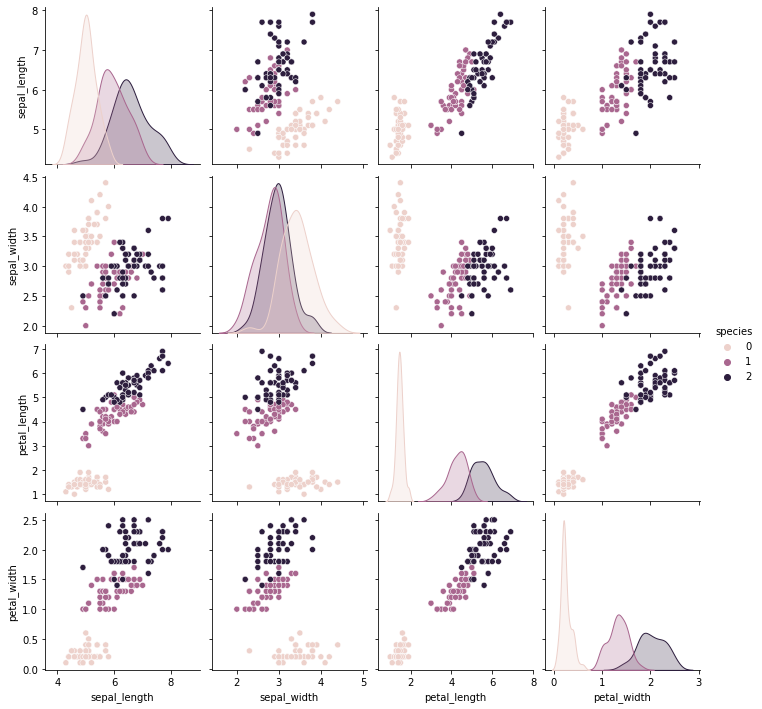

In [44]:
sns.pairplot(df, hue="species");

In [7]:
df.isnull().sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


TRANSFORM LABEL ENCODER

In [9]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
model=LabelEncoder()
model.fit(df.species)

LabelEncoder()

In [12]:
model.transform(df.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df['species']=model.transform(df.species)
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
129,7.2,3.0,5.8,1.6,2
41,4.5,2.3,1.3,0.3,0
114,5.8,2.8,5.1,2.4,2
99,5.7,2.8,4.1,1.3,1
54,6.5,2.8,4.6,1.5,1
83,6.0,2.7,5.1,1.6,1
137,6.4,3.1,5.5,1.8,2
146,6.3,2.5,5.0,1.9,2


SPLIT DATA

In [14]:
X=df.drop(["species"], axis=1)
y=df["species"]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
##TRAINING MODEL##

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
print(model.score(X,y)*100)


97.33333333333334


EVALUATION

In [23]:
model.intercept_

array([  8.89904778,   2.00728152, -10.9063293 ])

In [24]:
model.coef_

array([[-0.38933865,  0.9202372 , -2.33102313, -0.98321885],
       [ 0.49943393, -0.30978114, -0.21524742, -0.73381503],
       [-0.11009527, -0.61045607,  2.54627055,  1.71703388]])

PREDICTION

In [25]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

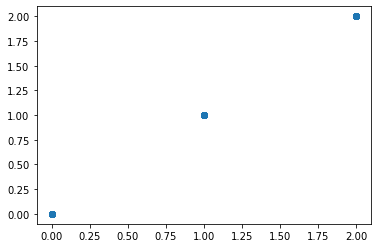

In [26]:
plt.scatter(y_test,y_pred);

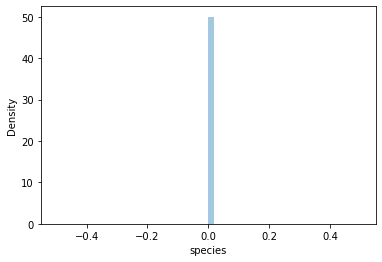

In [27]:
sns.distplot((y_test-y_pred), bins=50);

In [28]:
y_pred_train=model.predict(X_train)

EVALUATION METRICS

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [31]:

eval_metrics(y_test, y_pred)

R2 Score: 1.0
Mean Absolute Error(MAE): 0.0
Mean Square Error(MSE): 0.0
Root Mean Square Error(RMSE): 0.0


In [32]:
eval_metrics(y_train, y_pred_train)

R2 Score: 0.9451450961185258
Mean Absolute Error(MAE): 0.03571428571428571
Mean Square Error(MSE): 0.03571428571428571
Root Mean Square Error(RMSE): 0.1889822365046136


COMPARISON of ACTUAL and PREDICTIONs

In [33]:
my_dict={"Actual":y_test, "Predicted":y_pred}
compare=pd.DataFrame(my_dict)
compare

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import scikitplot.metrics as splt

In [35]:
results = confusion_matrix(compare.Actual, compare.Predicted)
print ('Confusion Matrix :\n',*results,sep='\n')

Confusion Matrix :

[15  0  0]
[ 0 11  0]
[ 0  0 12]


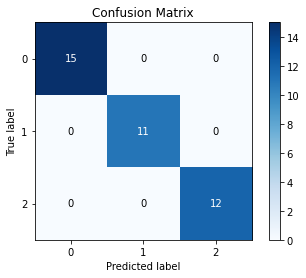

In [36]:
splt.plot_confusion_matrix(compare.Actual, compare.Predicted);

In [37]:
print ('Accuracy:',accuracy_score(compare.Actual, compare.Predicted))

Accuracy: 1.0


In [38]:
print('Classification Report :\n',classification_report(compare.Actual, compare.Predicted))

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



ROC CURVE WITH SCIKITPLOT

In [39]:
y_pred_proba = model.predict_proba(X_test)

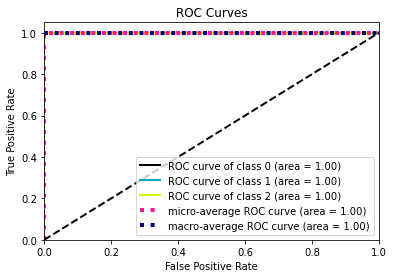

In [40]:
splt.plot_roc(y_test, y_pred_proba);